# CF Part 1 - Data loading and EDA
> Collaborative Filtering on MovieLens Latest-small Part 1 - Downloading movielens latest small dataset and exploratory data analysis

- toc: false
- badges: true
- comments: true
- categories: [movie, collaborative]
- image:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os

from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2021-06-23 06:11:54--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  3.95MB/s    in 0.2s    

2021-06-23 06:11:54 (3.95 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [3]:
DOWNLOAD_DESTINATION_DIR = "/content/ml-latest-small"

ratings_path = os.path.join(DOWNLOAD_DESTINATION_DIR, 'ratings.csv')
ratings = pd.read_csv(
    ratings_path,
    sep=',',
    names=["userid", "itemid", "rating", "timestamp"],
    skiprows=1
)

movies_path = os.path.join(DOWNLOAD_DESTINATION_DIR, 'movies.csv')
movies = pd.read_csv(
    movies_path,
    sep=',',
    names=["itemid", "title", "genres"],
    encoding='latin-1',
    skiprows=1
)

In [4]:
ratings.head()

,userid,itemid,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies.head()

,itemid,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
print("There are {} users and {} movies in this dataset."\
      .format(ratings.userid.nunique(),
              ratings.itemid.nunique()))

There are 610 users and 9724 movies in this dataset.


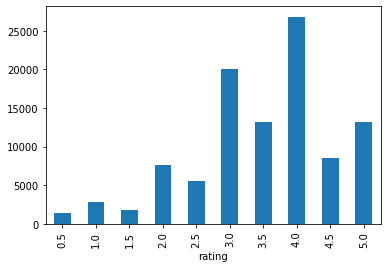

In [7]:
# histogram of ratings
ratings.groupby('rating').size().plot(kind='bar');

Ratings range from $0.5$ to $5.0$, with a step of $0.5$. The above histogram presents the repartition of ratings in the dataset. the two most commun ratings are $4.0$ and $3.0$ and the less common ratings are $0.5$ and $1.5$

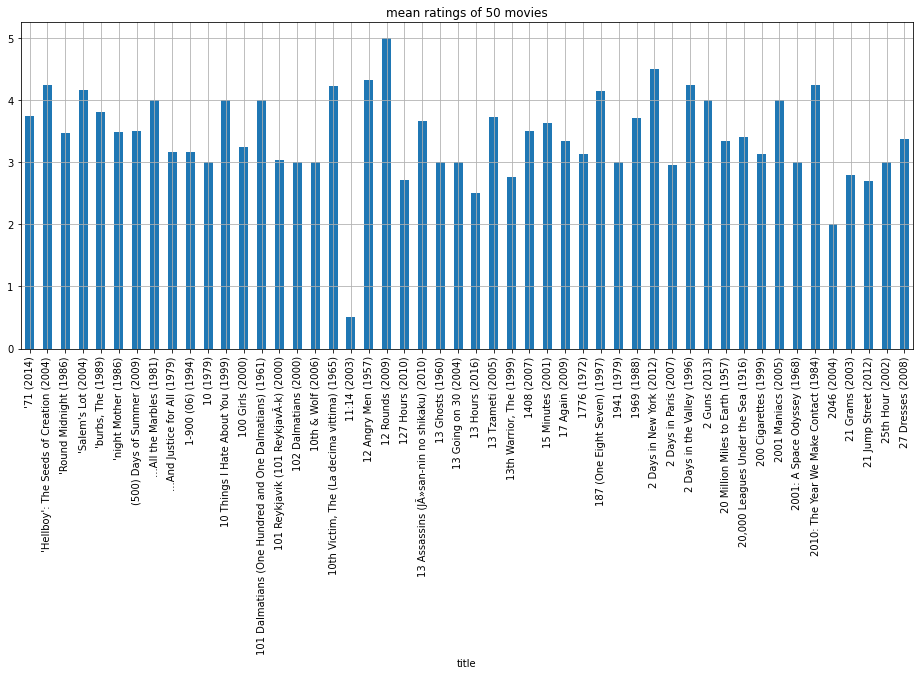

In [8]:
# average rating of movies
movie_means = ratings.join(movies['title'], on='itemid').groupby('title').rating.mean()
movie_means[:50].plot(kind='bar', grid=True, figsize=(16,6), title="mean ratings of 50 movies");

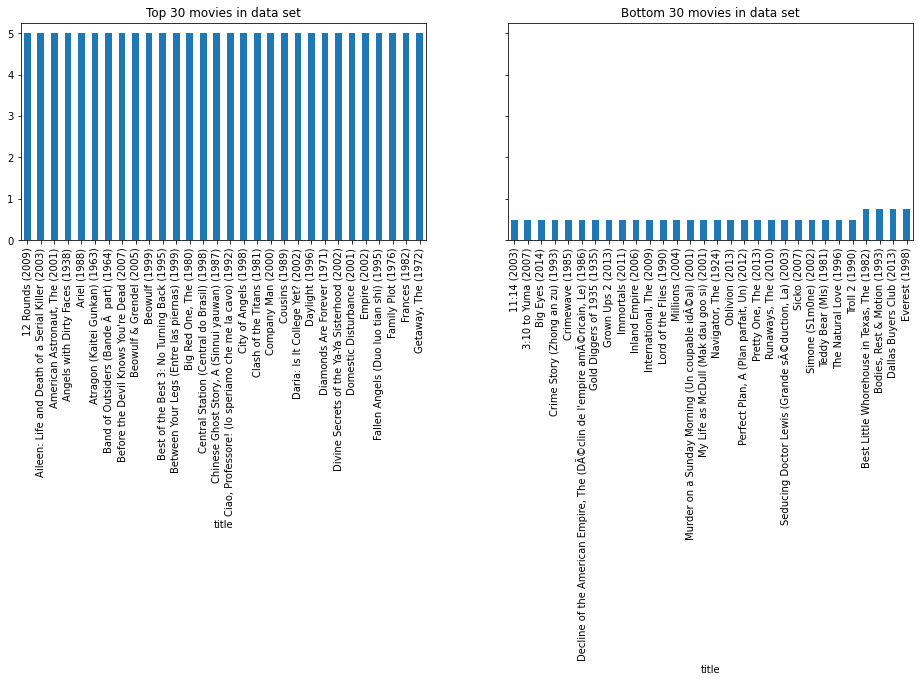

In [9]:
# 30 most rated movies vs. 30 less rated movies
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4), sharey=True)
movie_means.nlargest(30).plot(kind='bar', ax=ax1, title="Top 30 movies in data set");
movie_means.nsmallest(30).plot(kind='bar', ax=ax2, title="Bottom 30 movies in data set");

In [10]:
def ids_encoder(ratings):
    users = sorted(ratings['userid'].unique())
    items = sorted(ratings['itemid'].unique())

    # create users and items encoders
    uencoder = LabelEncoder()
    iencoder = LabelEncoder()

    # fit users and items ids to the corresponding encoder
    uencoder.fit(users)
    iencoder.fit(items)

    # encode userids and itemids
    ratings.userid = uencoder.transform(ratings.userid.tolist())
    ratings.itemid = iencoder.transform(ratings.itemid.tolist())

    return ratings, uencoder, iencoder

In [11]:
# userids and itemids encoding
ratings, uencoder, iencoder = ids_encoder(ratings)

In [12]:
# transform rating dataframe to matrix
def ratings_matrix(ratings):    
    return csr_matrix(pd.crosstab(ratings.userid, ratings.itemid, ratings.rating, aggfunc=sum).fillna(0).values)    

R = ratings_matrix(ratings)

In [13]:
R[:10,:10].todense()

matrix([[4. , 0. , 4. , 0. , 0. , 4. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 4. , 5. , 3. , 5. , 4. , 4. , 3. , 0. , 3. ],
        [4.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

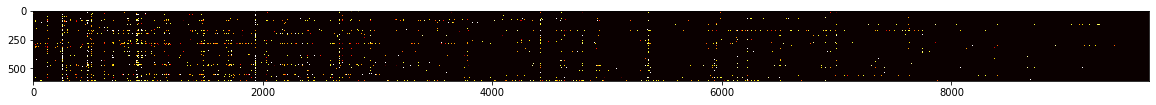

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(csr_matrix(R).todense(), cmap='hot', interpolation='nearest')
plt.show()

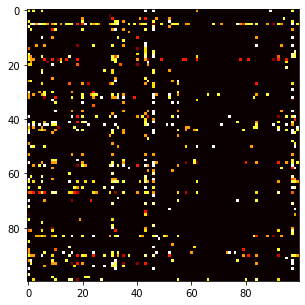

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(csr_matrix(R[:100,:100]).todense(), cmap='hot', interpolation='nearest')
plt.show()